# ROC曲线

绘制每个类别的ROC曲线，计算AUC值。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [2]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

'wget' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


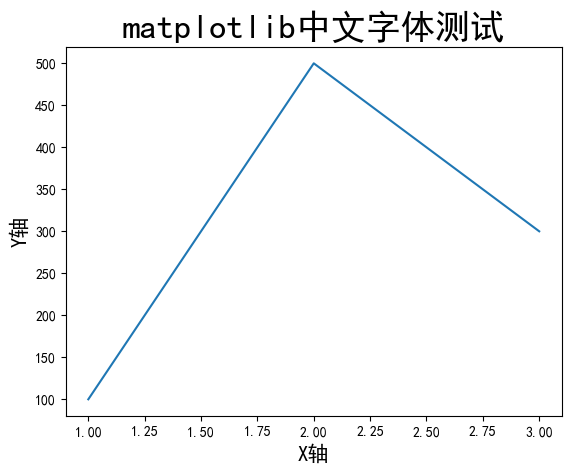

In [3]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 导入工具包

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入类别名称和ID

In [5]:
idx_to_labels = np.load(r'E:\MV-Code-202018010103-Lucy\main\Train_Custom_Dataset\图像分类\3-【Pytorch】迁移学习训练自己的图像分类模型\idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

['parasitized', 'uninfected']


## 载入测试集预测结果表格

In [6]:
df = pd.read_csv('测试集预测结果.csv')

In [7]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-n预测正确,parasitized-预测置信度,uninfected-预测置信度
0,D:\dataset\sr\val\parasitized\C100P61ThinF_IMG...,0,parasitized,0,parasitized,1,uninfected,True,0.999998,2.221901e-06
1,D:\dataset\sr\val\parasitized\C100P61ThinF_IMG...,0,parasitized,0,parasitized,1,uninfected,True,0.999980,2.029260e-05
2,D:\dataset\sr\val\parasitized\C100P61ThinF_IMG...,0,parasitized,0,parasitized,1,uninfected,True,1.000000,3.772365e-10
3,D:\dataset\sr\val\parasitized\C100P61ThinF_IMG...,0,parasitized,0,parasitized,1,uninfected,True,1.000000,2.734464e-08
4,D:\dataset\sr\val\parasitized\C100P61ThinF_IMG...,0,parasitized,0,parasitized,1,uninfected,True,1.000000,2.457842e-09


## 绘制某一类别的ROC曲线

In [8]:
specific_class = 'parasitized'

In [9]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [10]:
y_test

0        True
1        True
2        True
3        True
4        True
        ...  
5507    False
5508    False
5509    False
5510    False
5511    False
Name: 标注类别名称, Length: 5512, dtype: bool

In [11]:
# 二分类置信度
y_score = df['parasitized-预测置信度']

In [12]:
y_score

0       9.999977e-01
1       9.999797e-01
2       1.000000e+00
3       1.000000e+00
4       1.000000e+00
            ...     
5507    1.178485e-08
5508    4.195468e-09
5509    4.180054e-08
5510    1.563359e-11
5511    1.378911e-06
Name: parasitized-预测置信度, Length: 5512, dtype: float64

In [13]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

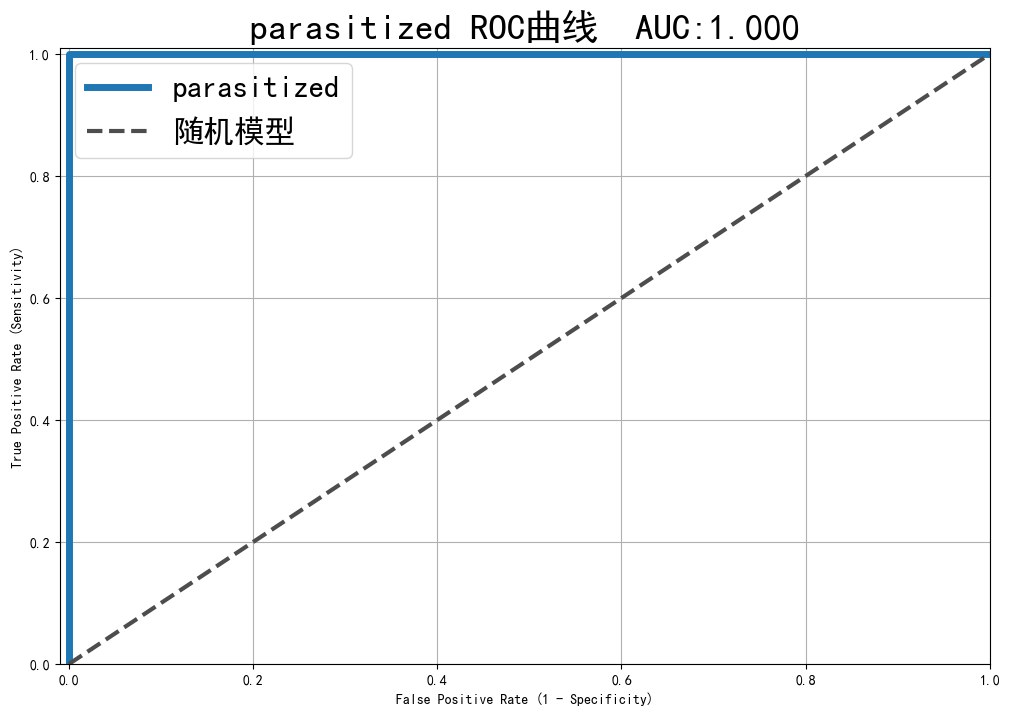

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

plt.savefig('{}-ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

# yticks = ax.yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)

In [15]:
auc(fpr, tpr)

1.0

## 绘制所有类别的ROC曲线

In [16]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [17]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [18]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

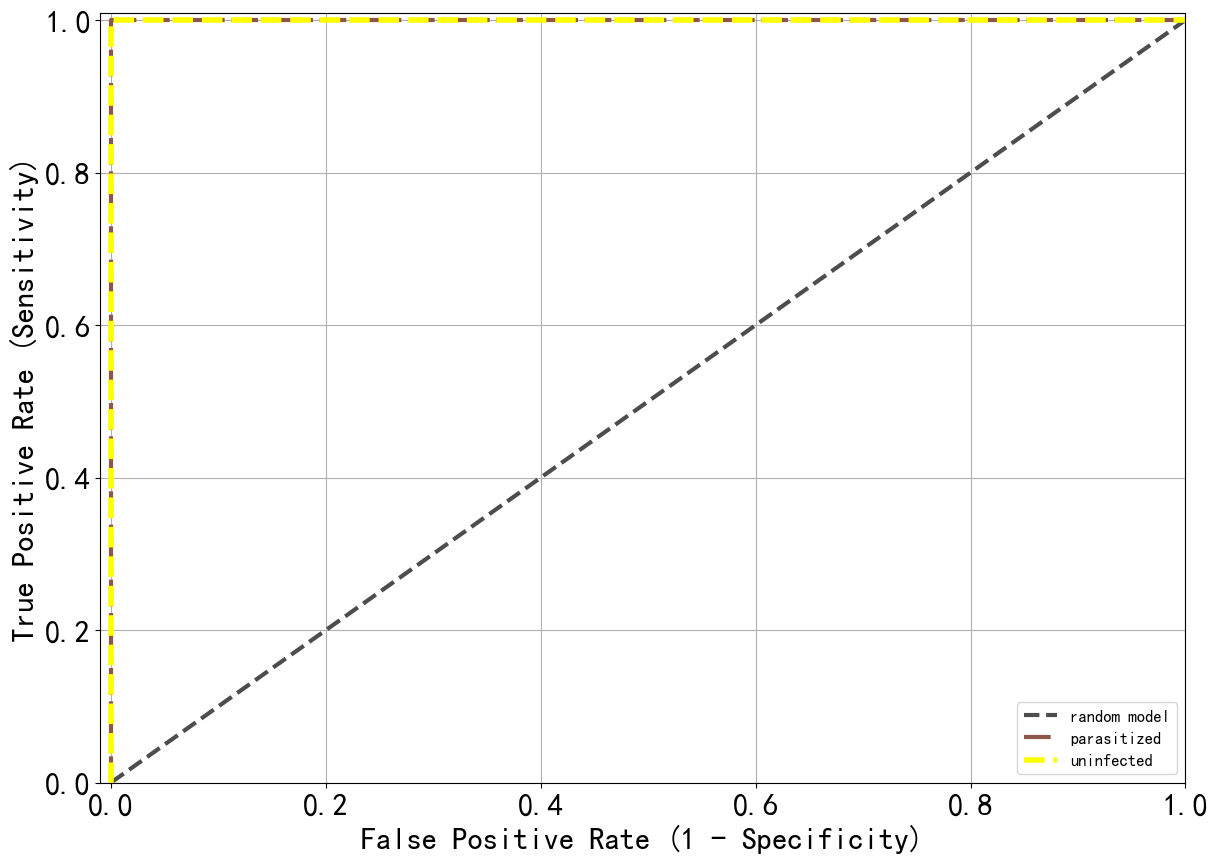

In [22]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='random model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=12)
plt.savefig('各类别ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 将AUC增加至`各类别准确率评估指标`表格中

In [23]:
df_report = pd.read_csv('各类别准确率评估指标.csv')

In [24]:
df_report

,类别,precision,recall,f1-score,support,accuracy
0,parasitized,1.0,1.0,1.0,2756.0,1.0
1,uninfected,1.0,1.0,1.0,2756.0,1.0
2,macro avg,1.0,1.0,1.0,5512.0,1.0
3,weighted avg,1.0,1.0,1.0,5512.0,1.0


In [25]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list * df_report.iloc[:-2]['support'] / len(df))

In [26]:
auc_list.append(macro_avg_auc)
auc_list.append(weighted_avg_auc)

In [27]:
df_report['AUC'] = auc_list

In [28]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AUC
0,parasitized,1.0,1.0,1.0,2756.0,1.0,1.0
1,uninfected,1.0,1.0,1.0,2756.0,1.0,1.0
2,macro avg,1.0,1.0,1.0,5512.0,1.0,1.0
3,weighted avg,1.0,1.0,1.0,5512.0,1.0,1.0


In [29]:
df_report.to_csv('各类别准确率评估指标.csv', index=False)